In [4]:
import pandas as pd
#from pandas_profiling import ProfileReport
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import datetime, pytz
import math

In [7]:
Data = pd.read_excel("/media/sda6/Projects/Data Mining on gas Network/output.xls",dtype={'TOF':"category", 'AF':"category",
       'DS':"category", 'feeder':"category",'TOP':"category", 'Relay':"category", 'COB':"category", 'PD':"category",
       'COP':"category","DOFDB":"float64"}).drop('BN',axis=1)

In [9]:
time=list()
for i in Data['DFB']:
    i=i.split()
    yeardaymonth=i[0].split("/")
    hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
Data['DFB']=time

In [10]:
time=list()
for i in Data['CFB']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['CFB']=time

In [11]:
time=list()
for i in Data['PS']:
    try:
        i=i.split()
        yeardaymonth=i[0].split("/")
        hourandminute=i[1].split(":")
        time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2]),int(hourandminute[0]),int(hourandminute[1])).to_gregorian())
    except:
        time.append(float("NaN"))
Data['PS']=time

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   BN      1649 non-null   int64         
 1   TOF     1649 non-null   object        
 2   AF      1649 non-null   object        
 3   DS      1649 non-null   object        
 4   feeder  1649 non-null   category      
 5   RC      1649 non-null   float64       
 6   TOP     1649 non-null   object        
 7   Relay   1649 non-null   category      
 8   COB     1649 non-null   object        
 9   PD      858 non-null    object        
 10  COP     807 non-null    object        
 11  DFB     1649 non-null   datetime64[ns]
 12  CFB     1646 non-null   datetime64[ns]
 13  DOFDB   1649 non-null   int64         
 14  PS      812 non-null    datetime64[ns]
 15  STOLP   813 non-null    float64       
 16  EENS    1649 non-null   float64       
dtypes: category(2), datetime64[ns](3), float64(3), int64

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


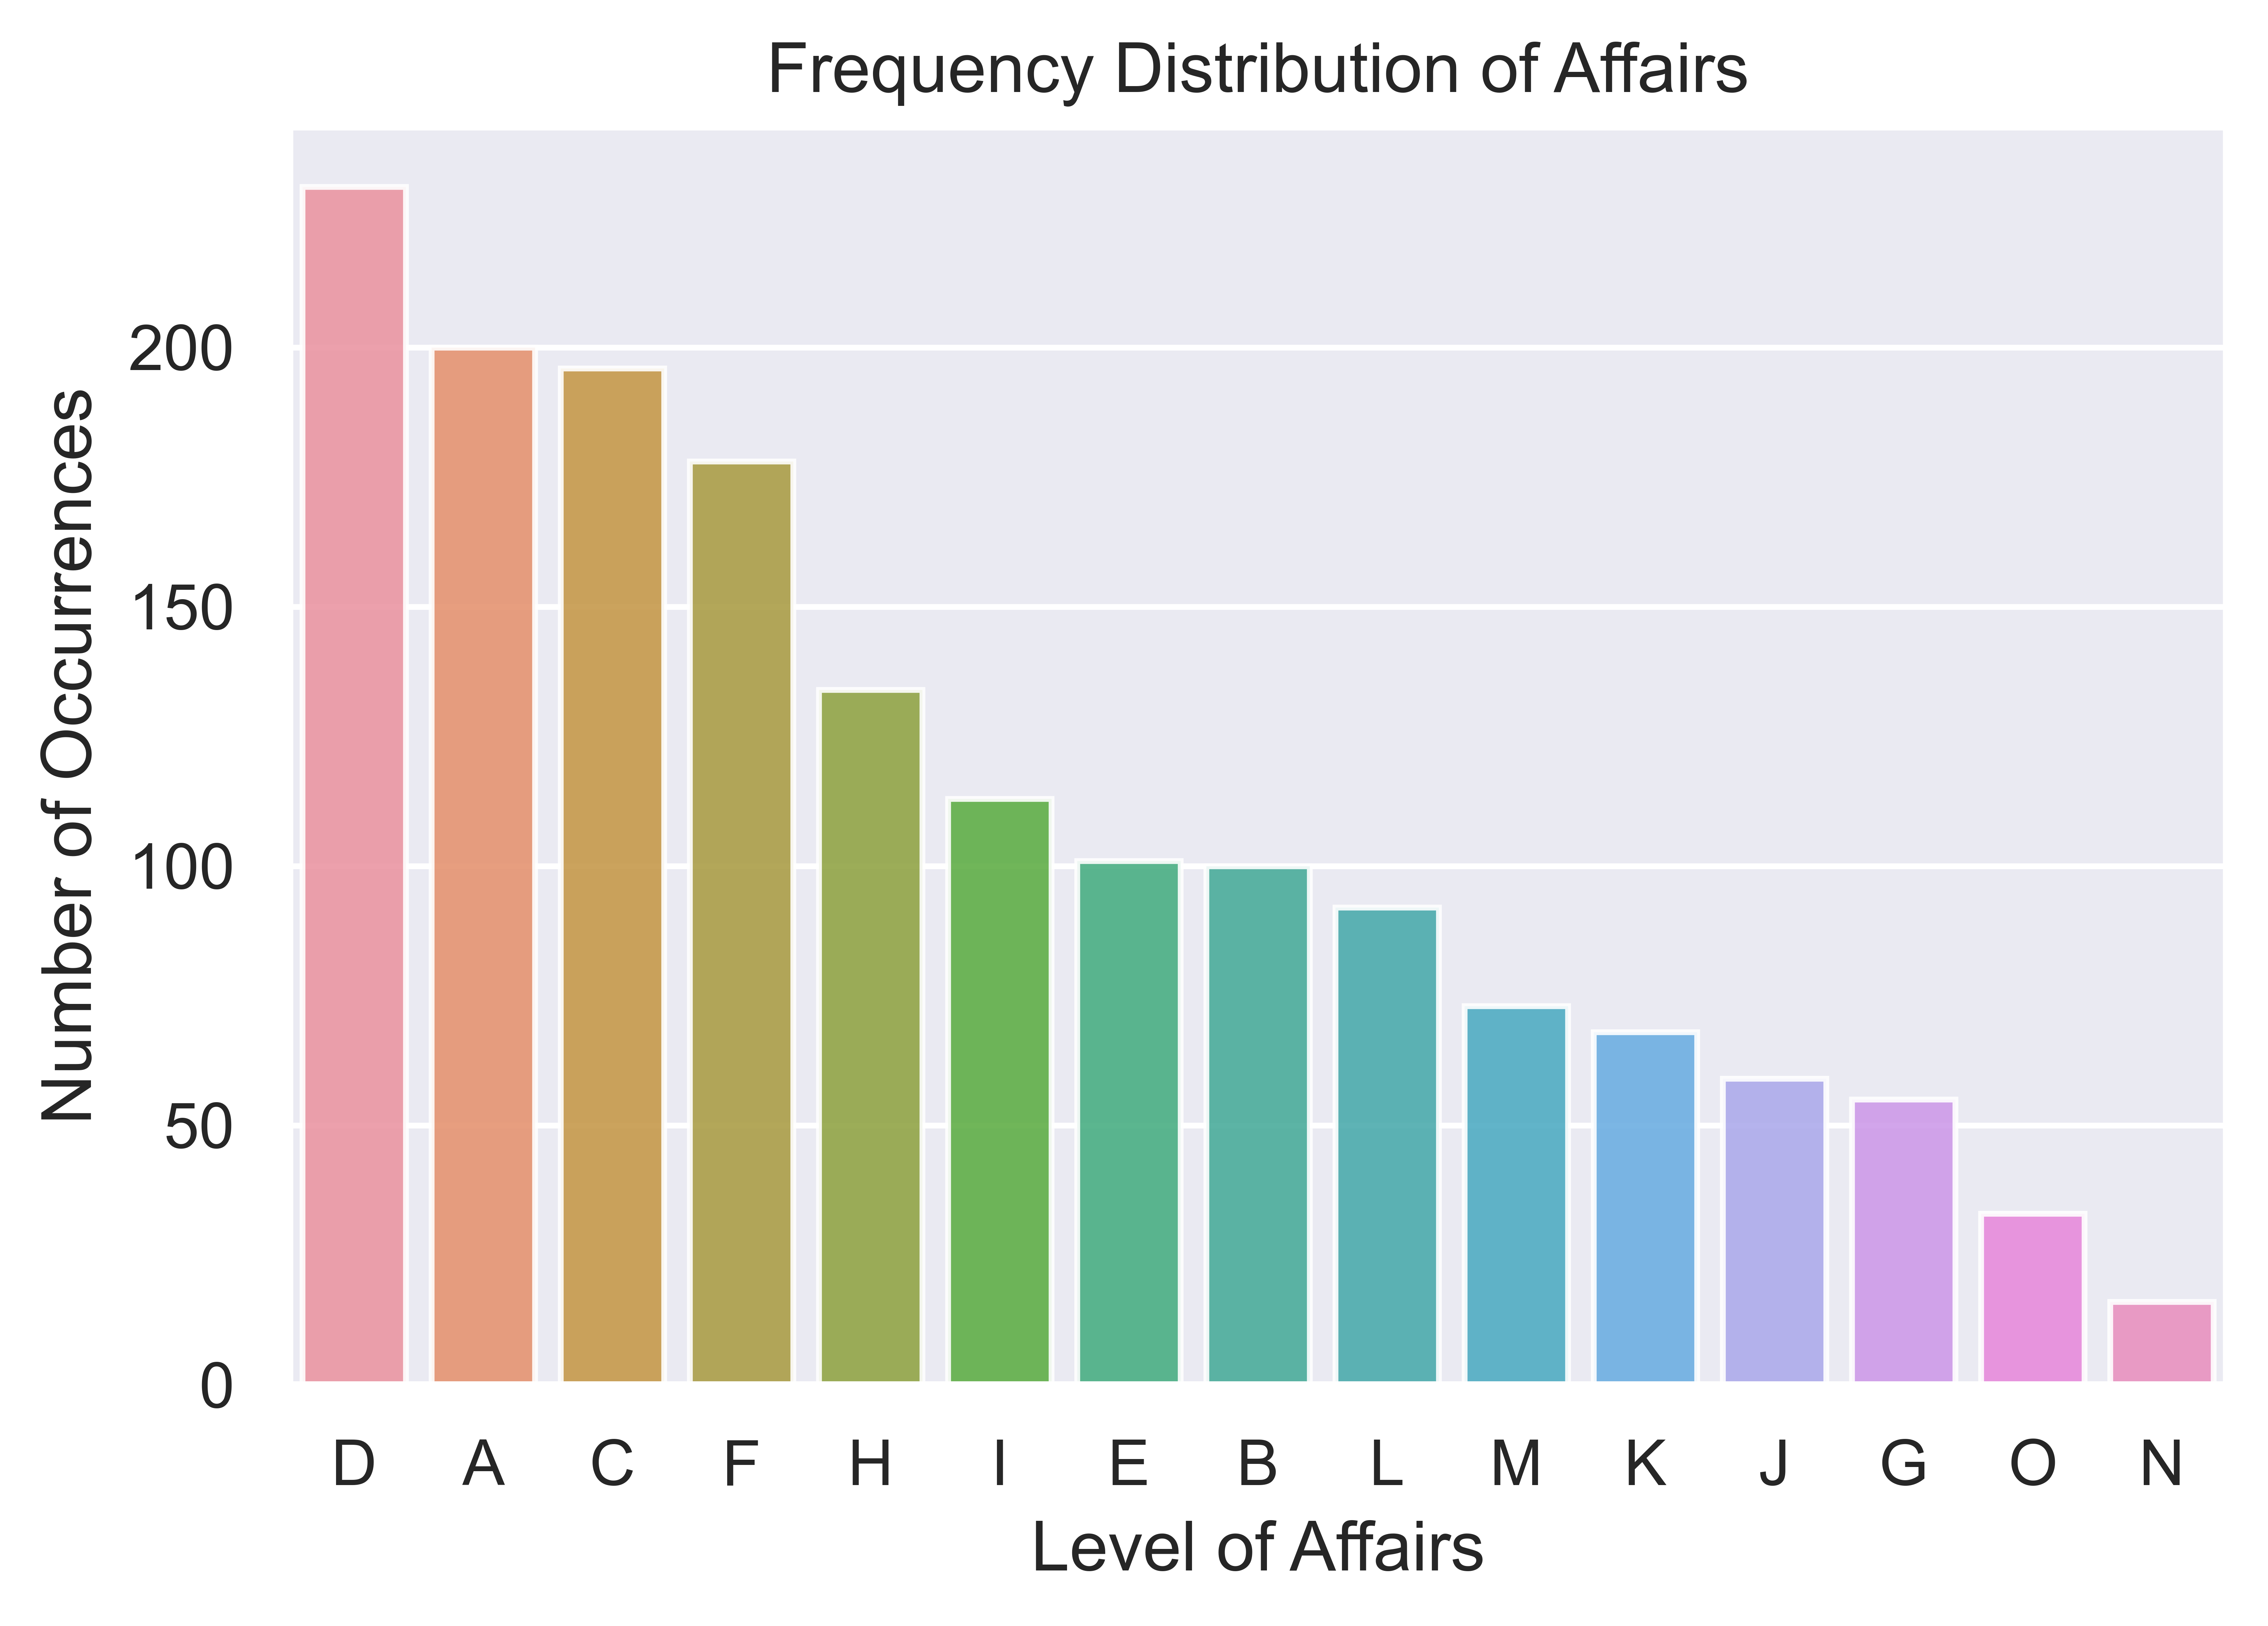

In [14]:
plt.figure(dpi=1200)
variable_count = Data['AF'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of Affairs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of Affairs', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


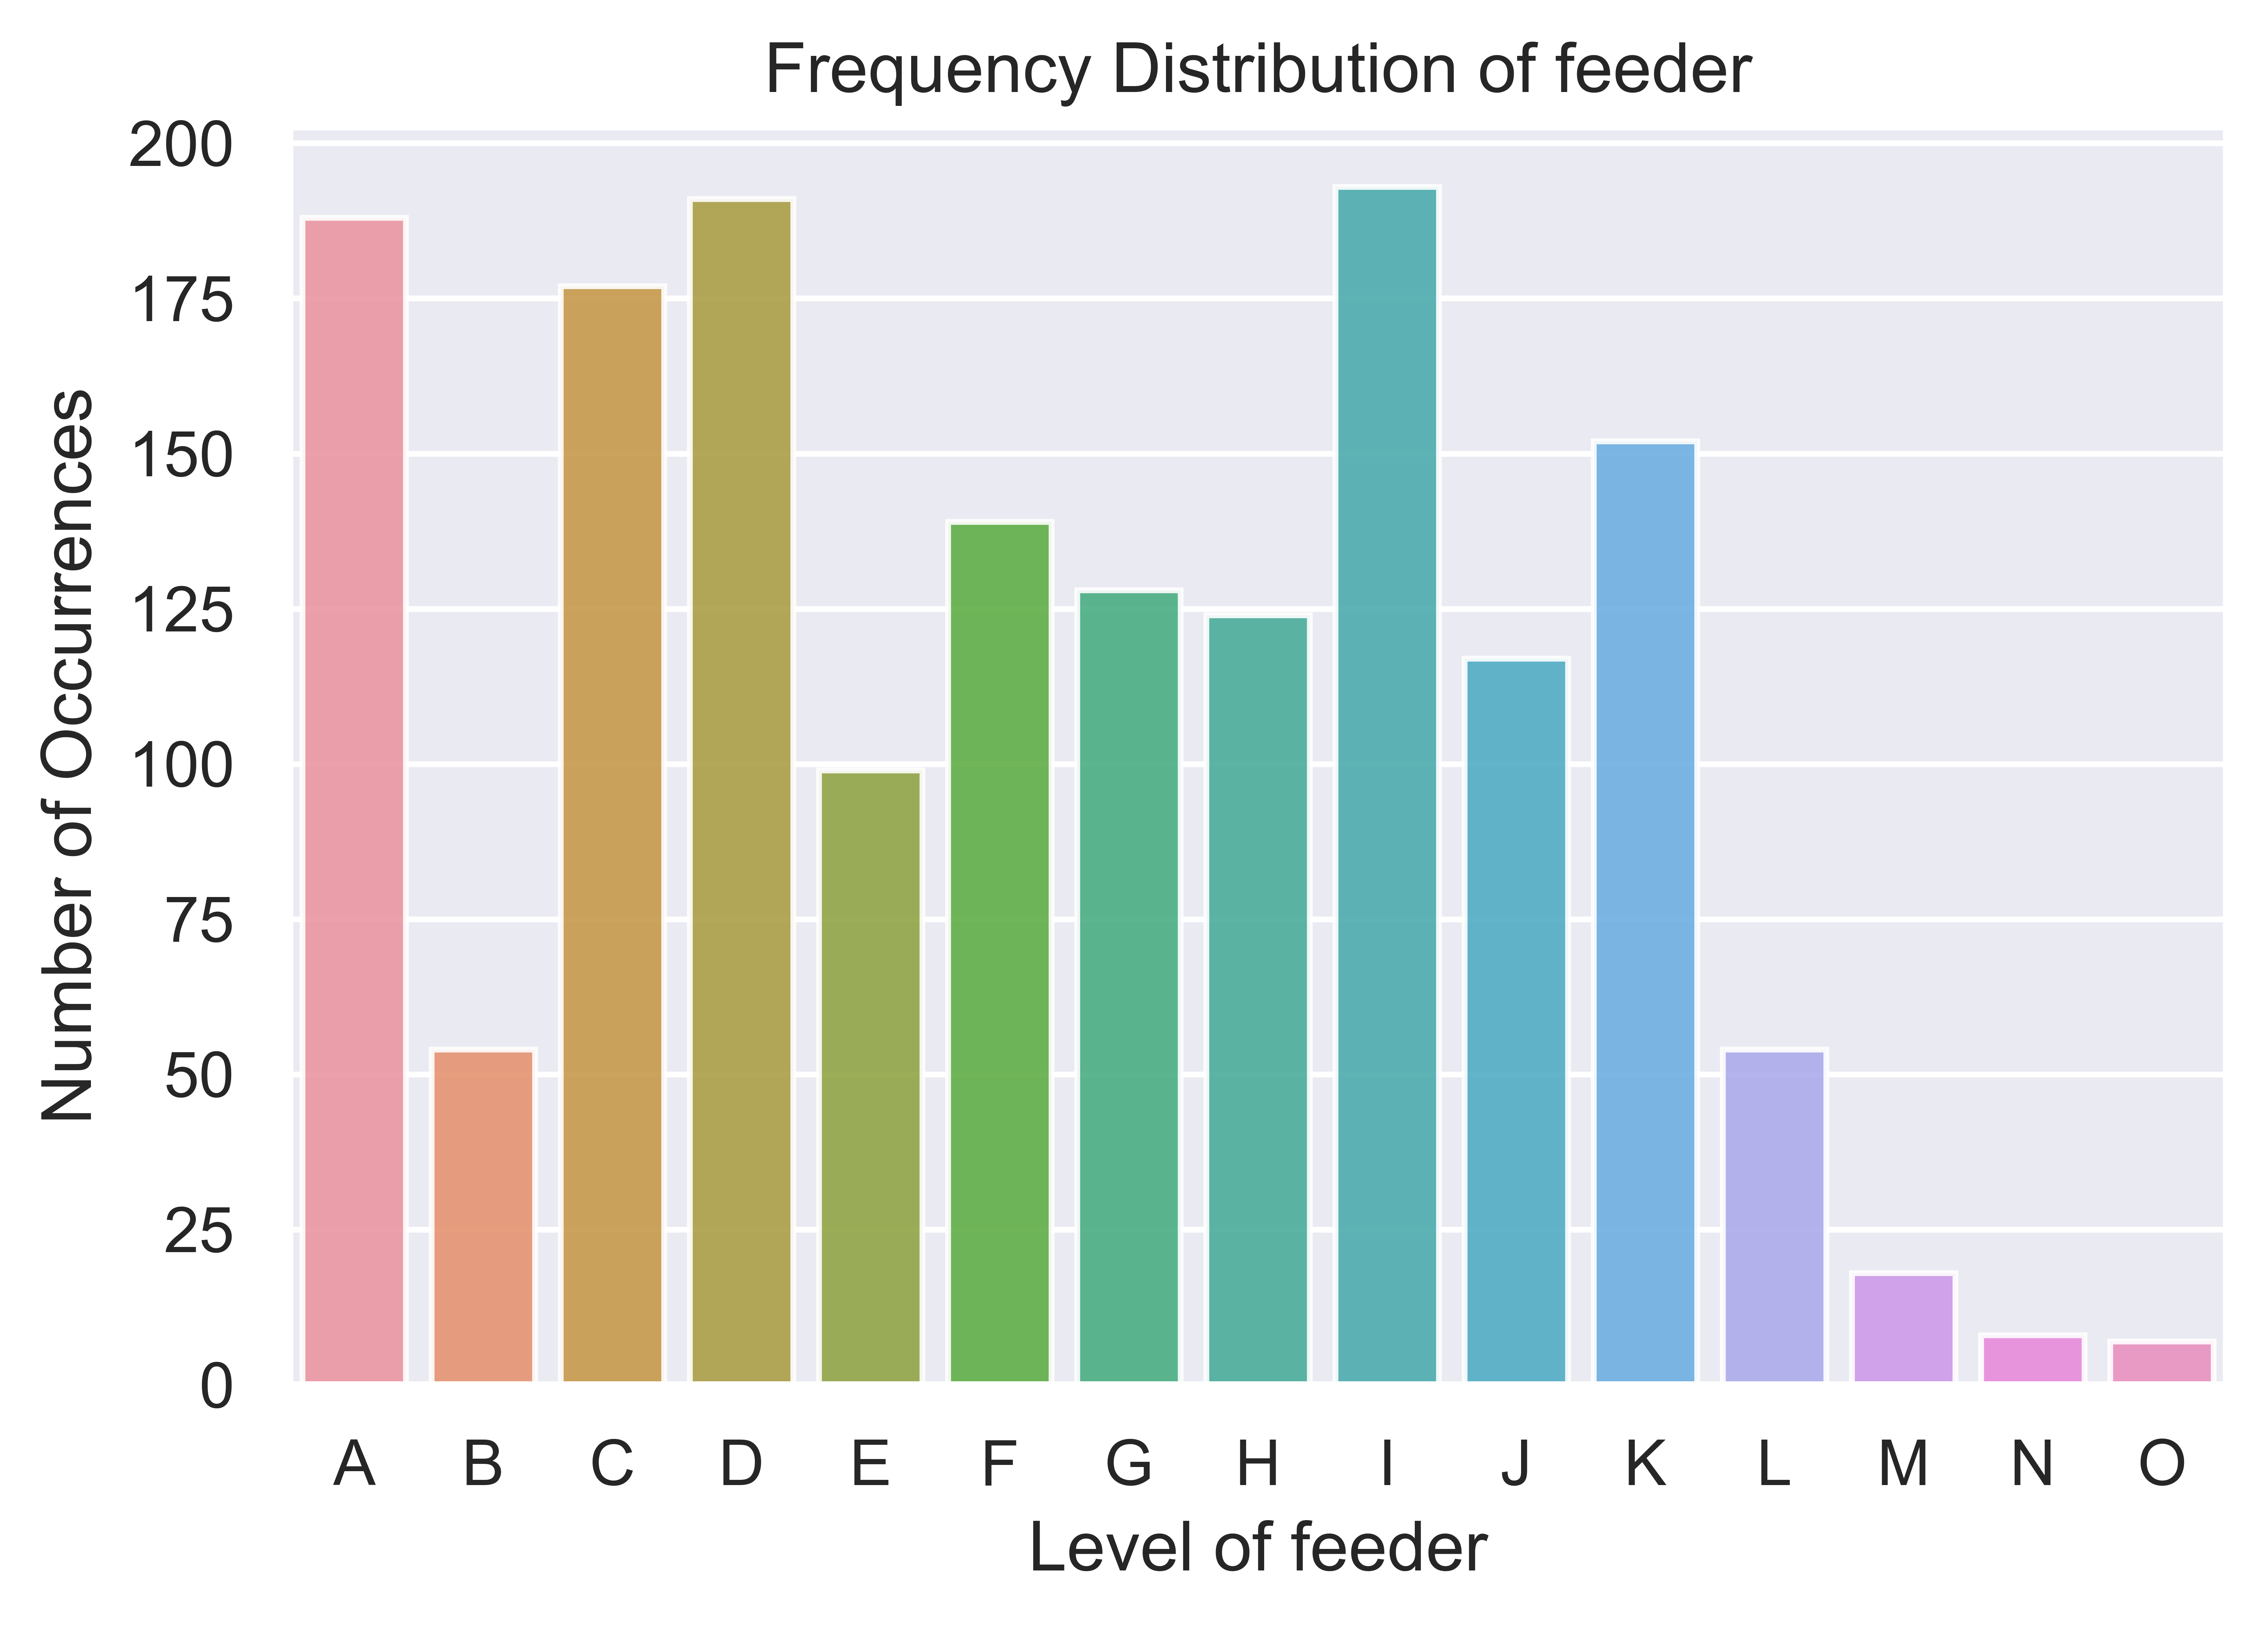

In [15]:
plt.figure(dpi=1200)
variable_count = Data['feeder'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of feeder')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of feeder', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


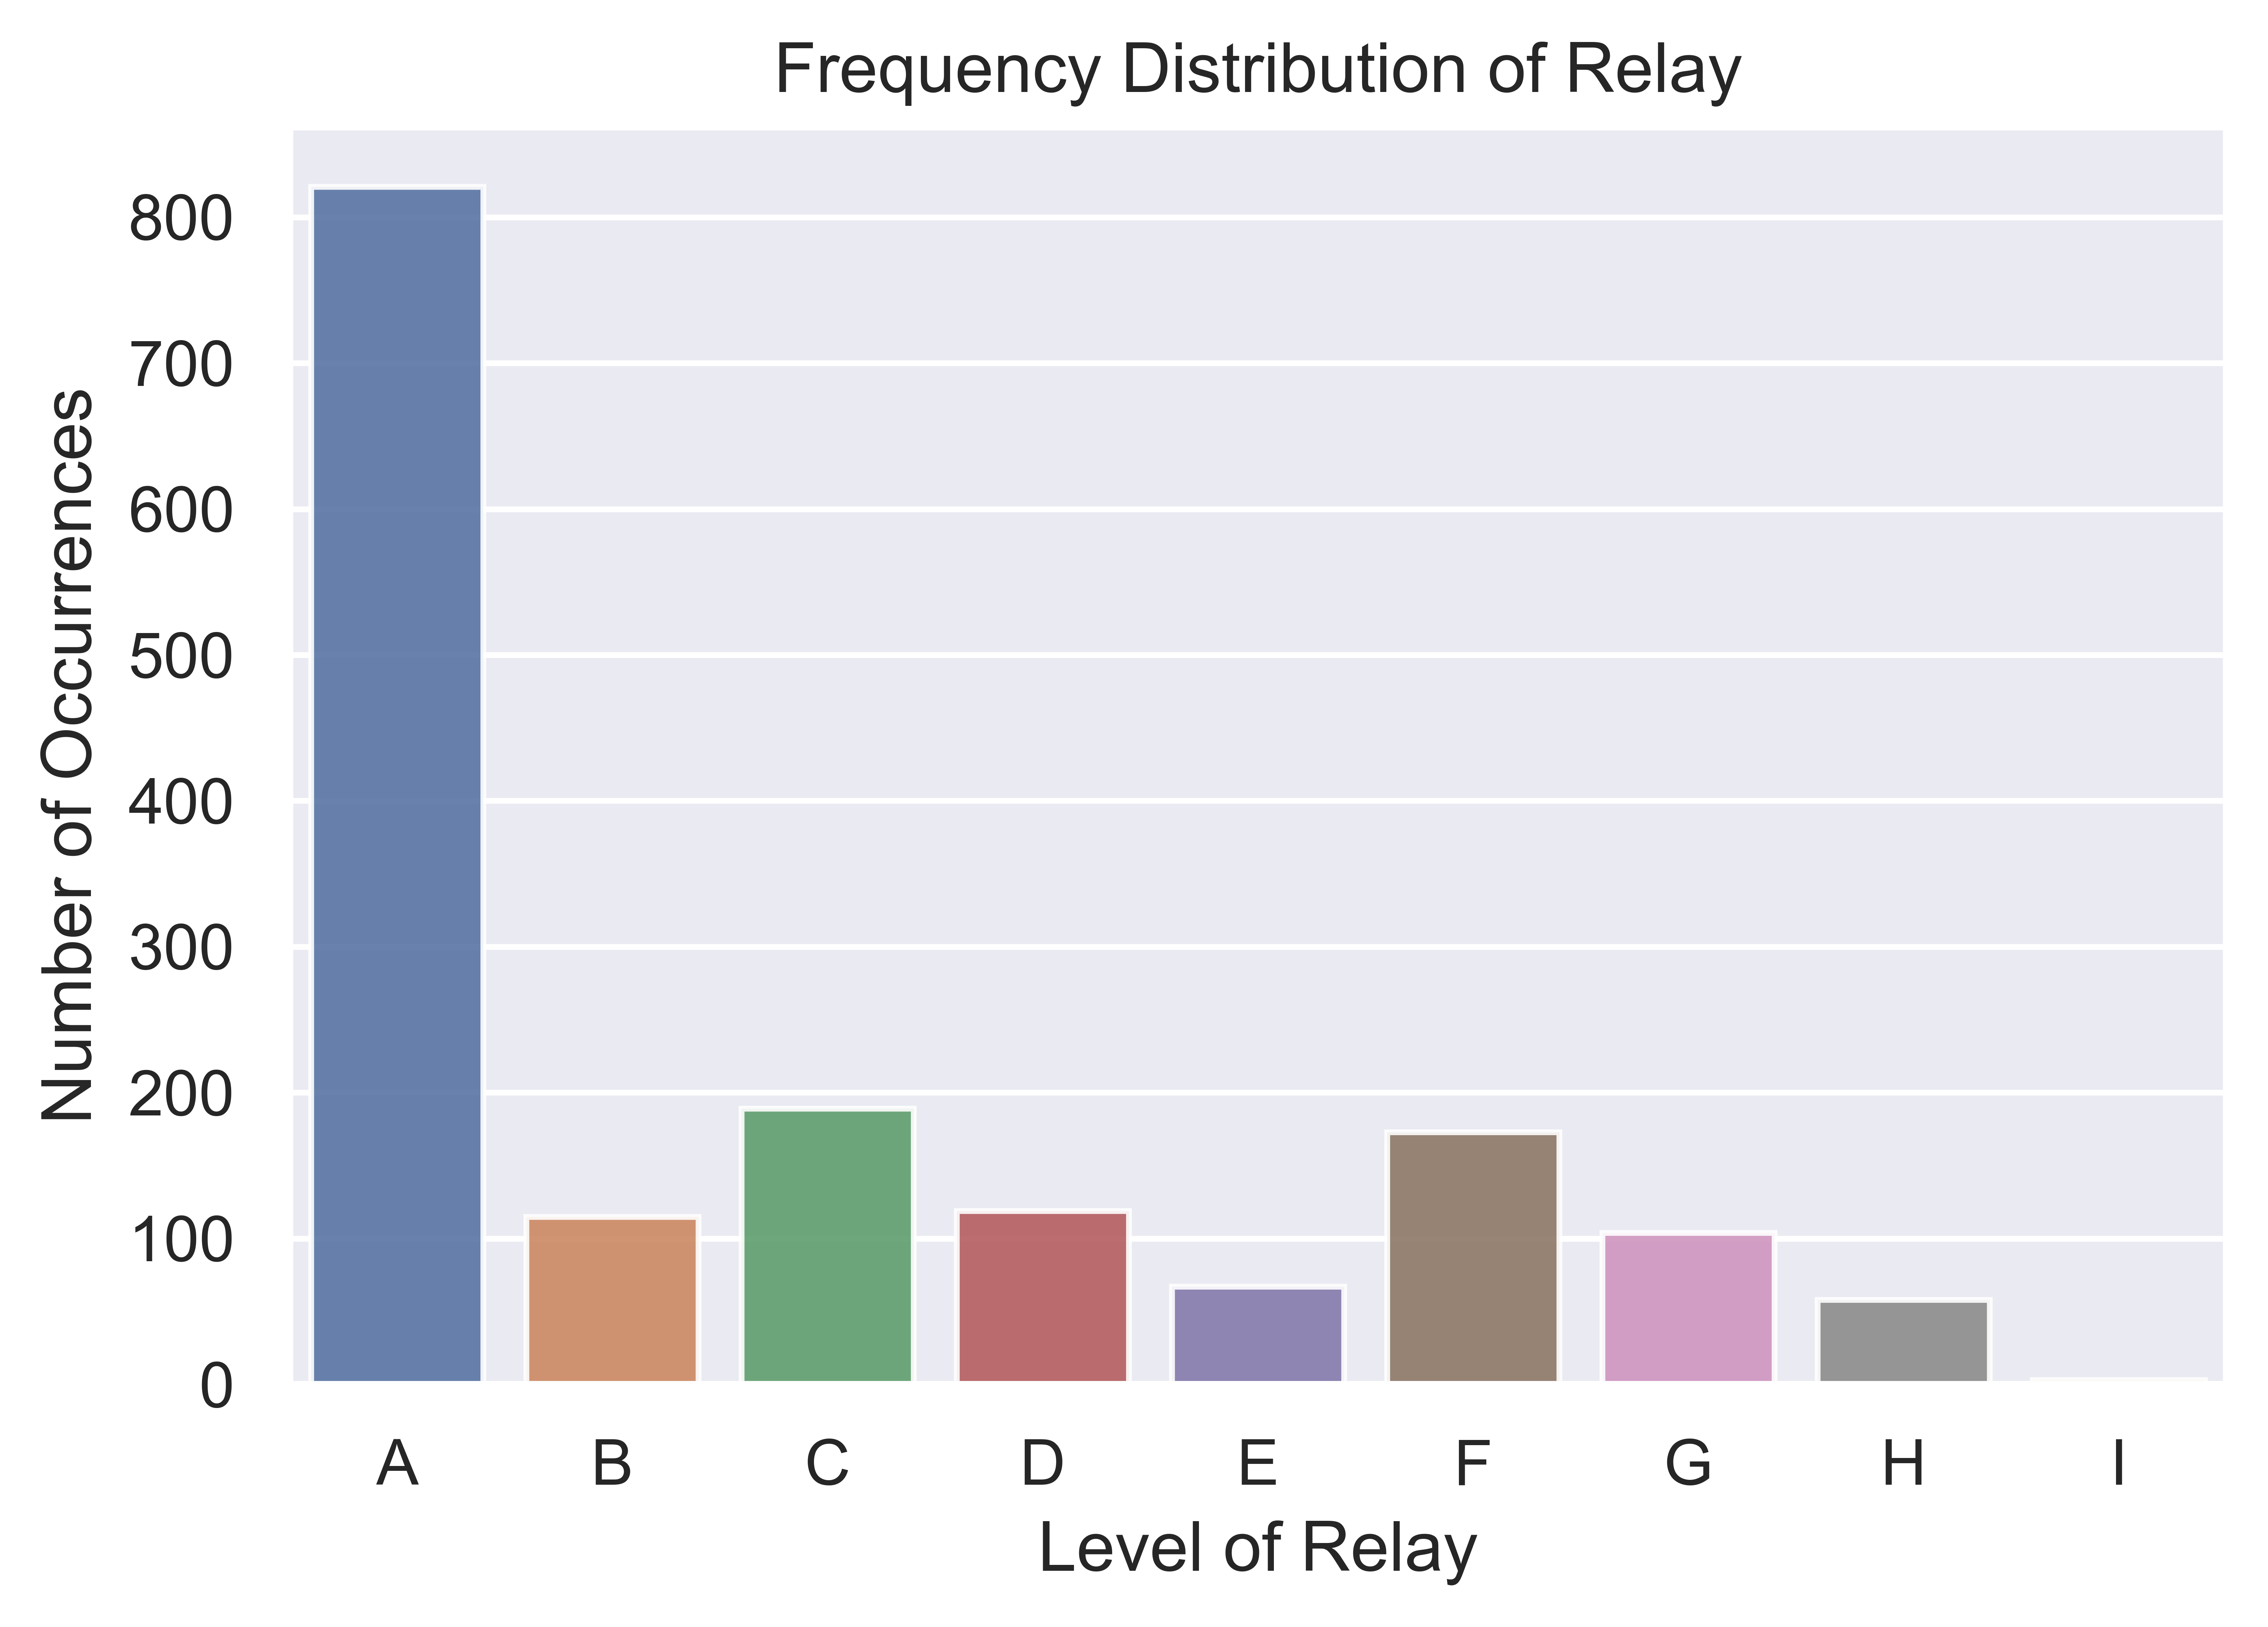

In [16]:
plt.figure(dpi=1200)
variable_count = Data['Relay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(variable_count.index, variable_count.values, alpha=0.9)
plt.title('Frequency Distribution of Relay')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Level of Relay', fontsize=12);
#plt.savefig('/media/sda6/Projects/Game Analysis/Stress.png')

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


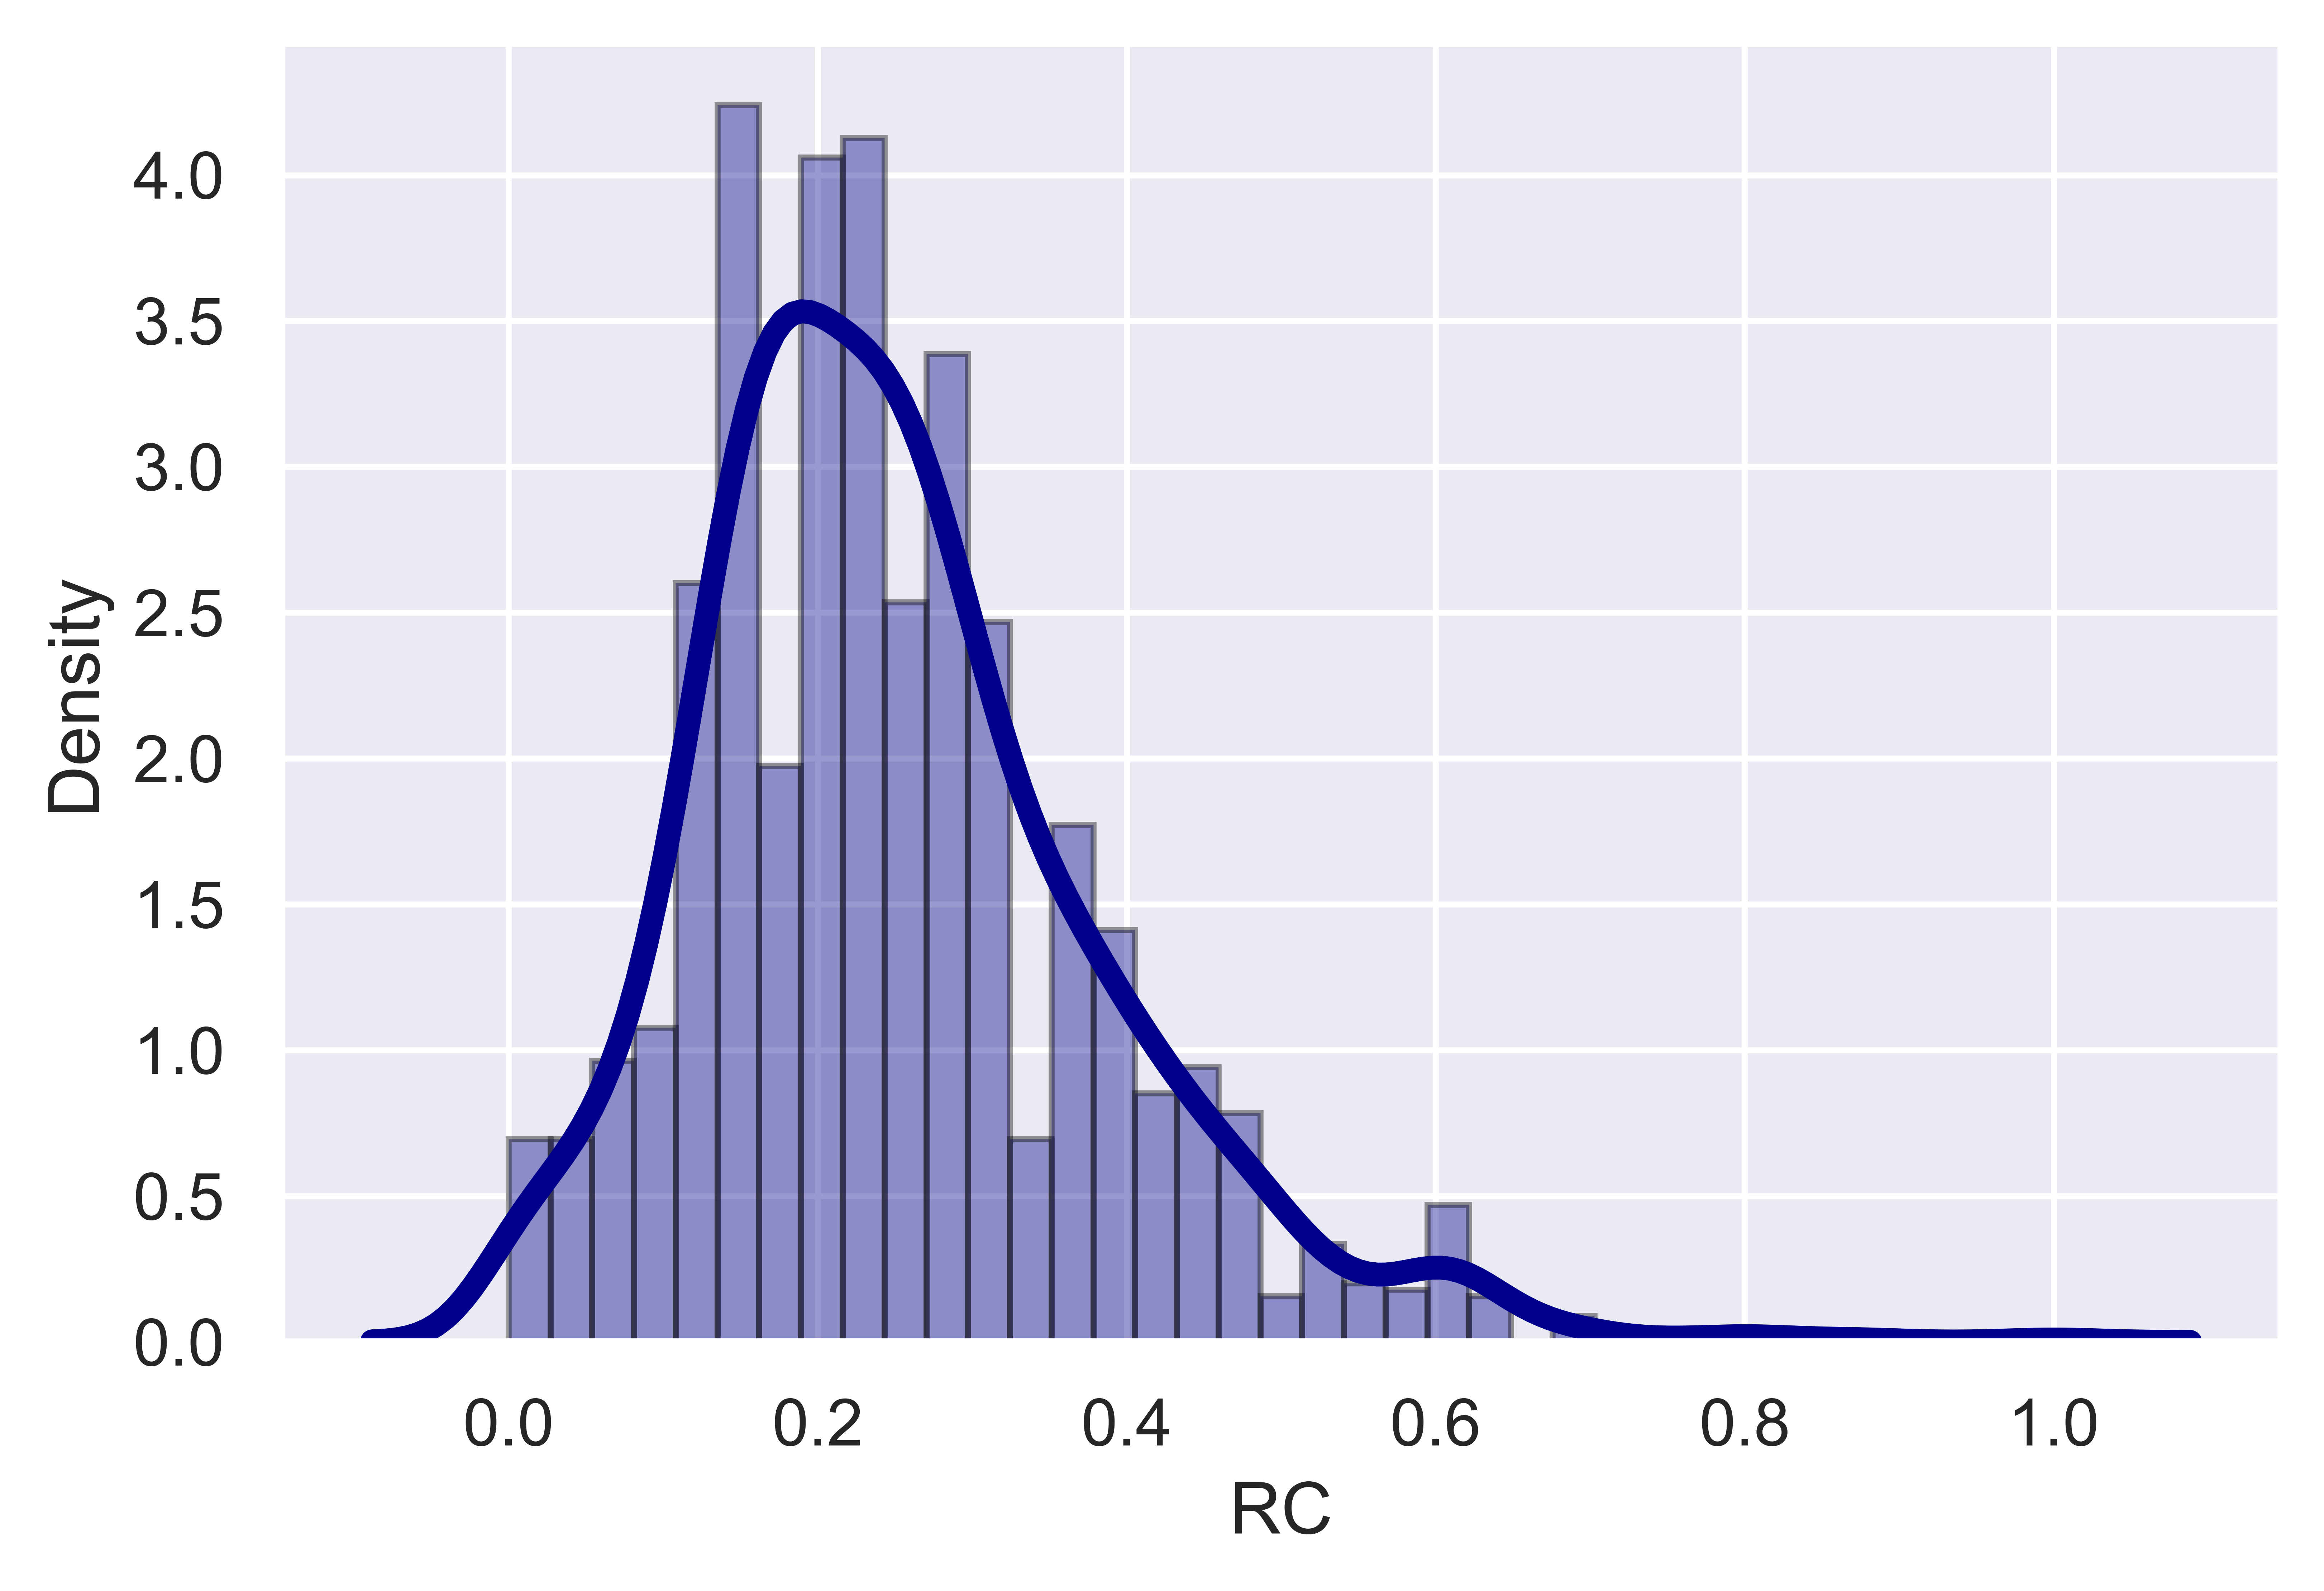

In [18]:
plt.figure(dpi=1200)
sns.distplot(Data['RC'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

/home/hamid/snap/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


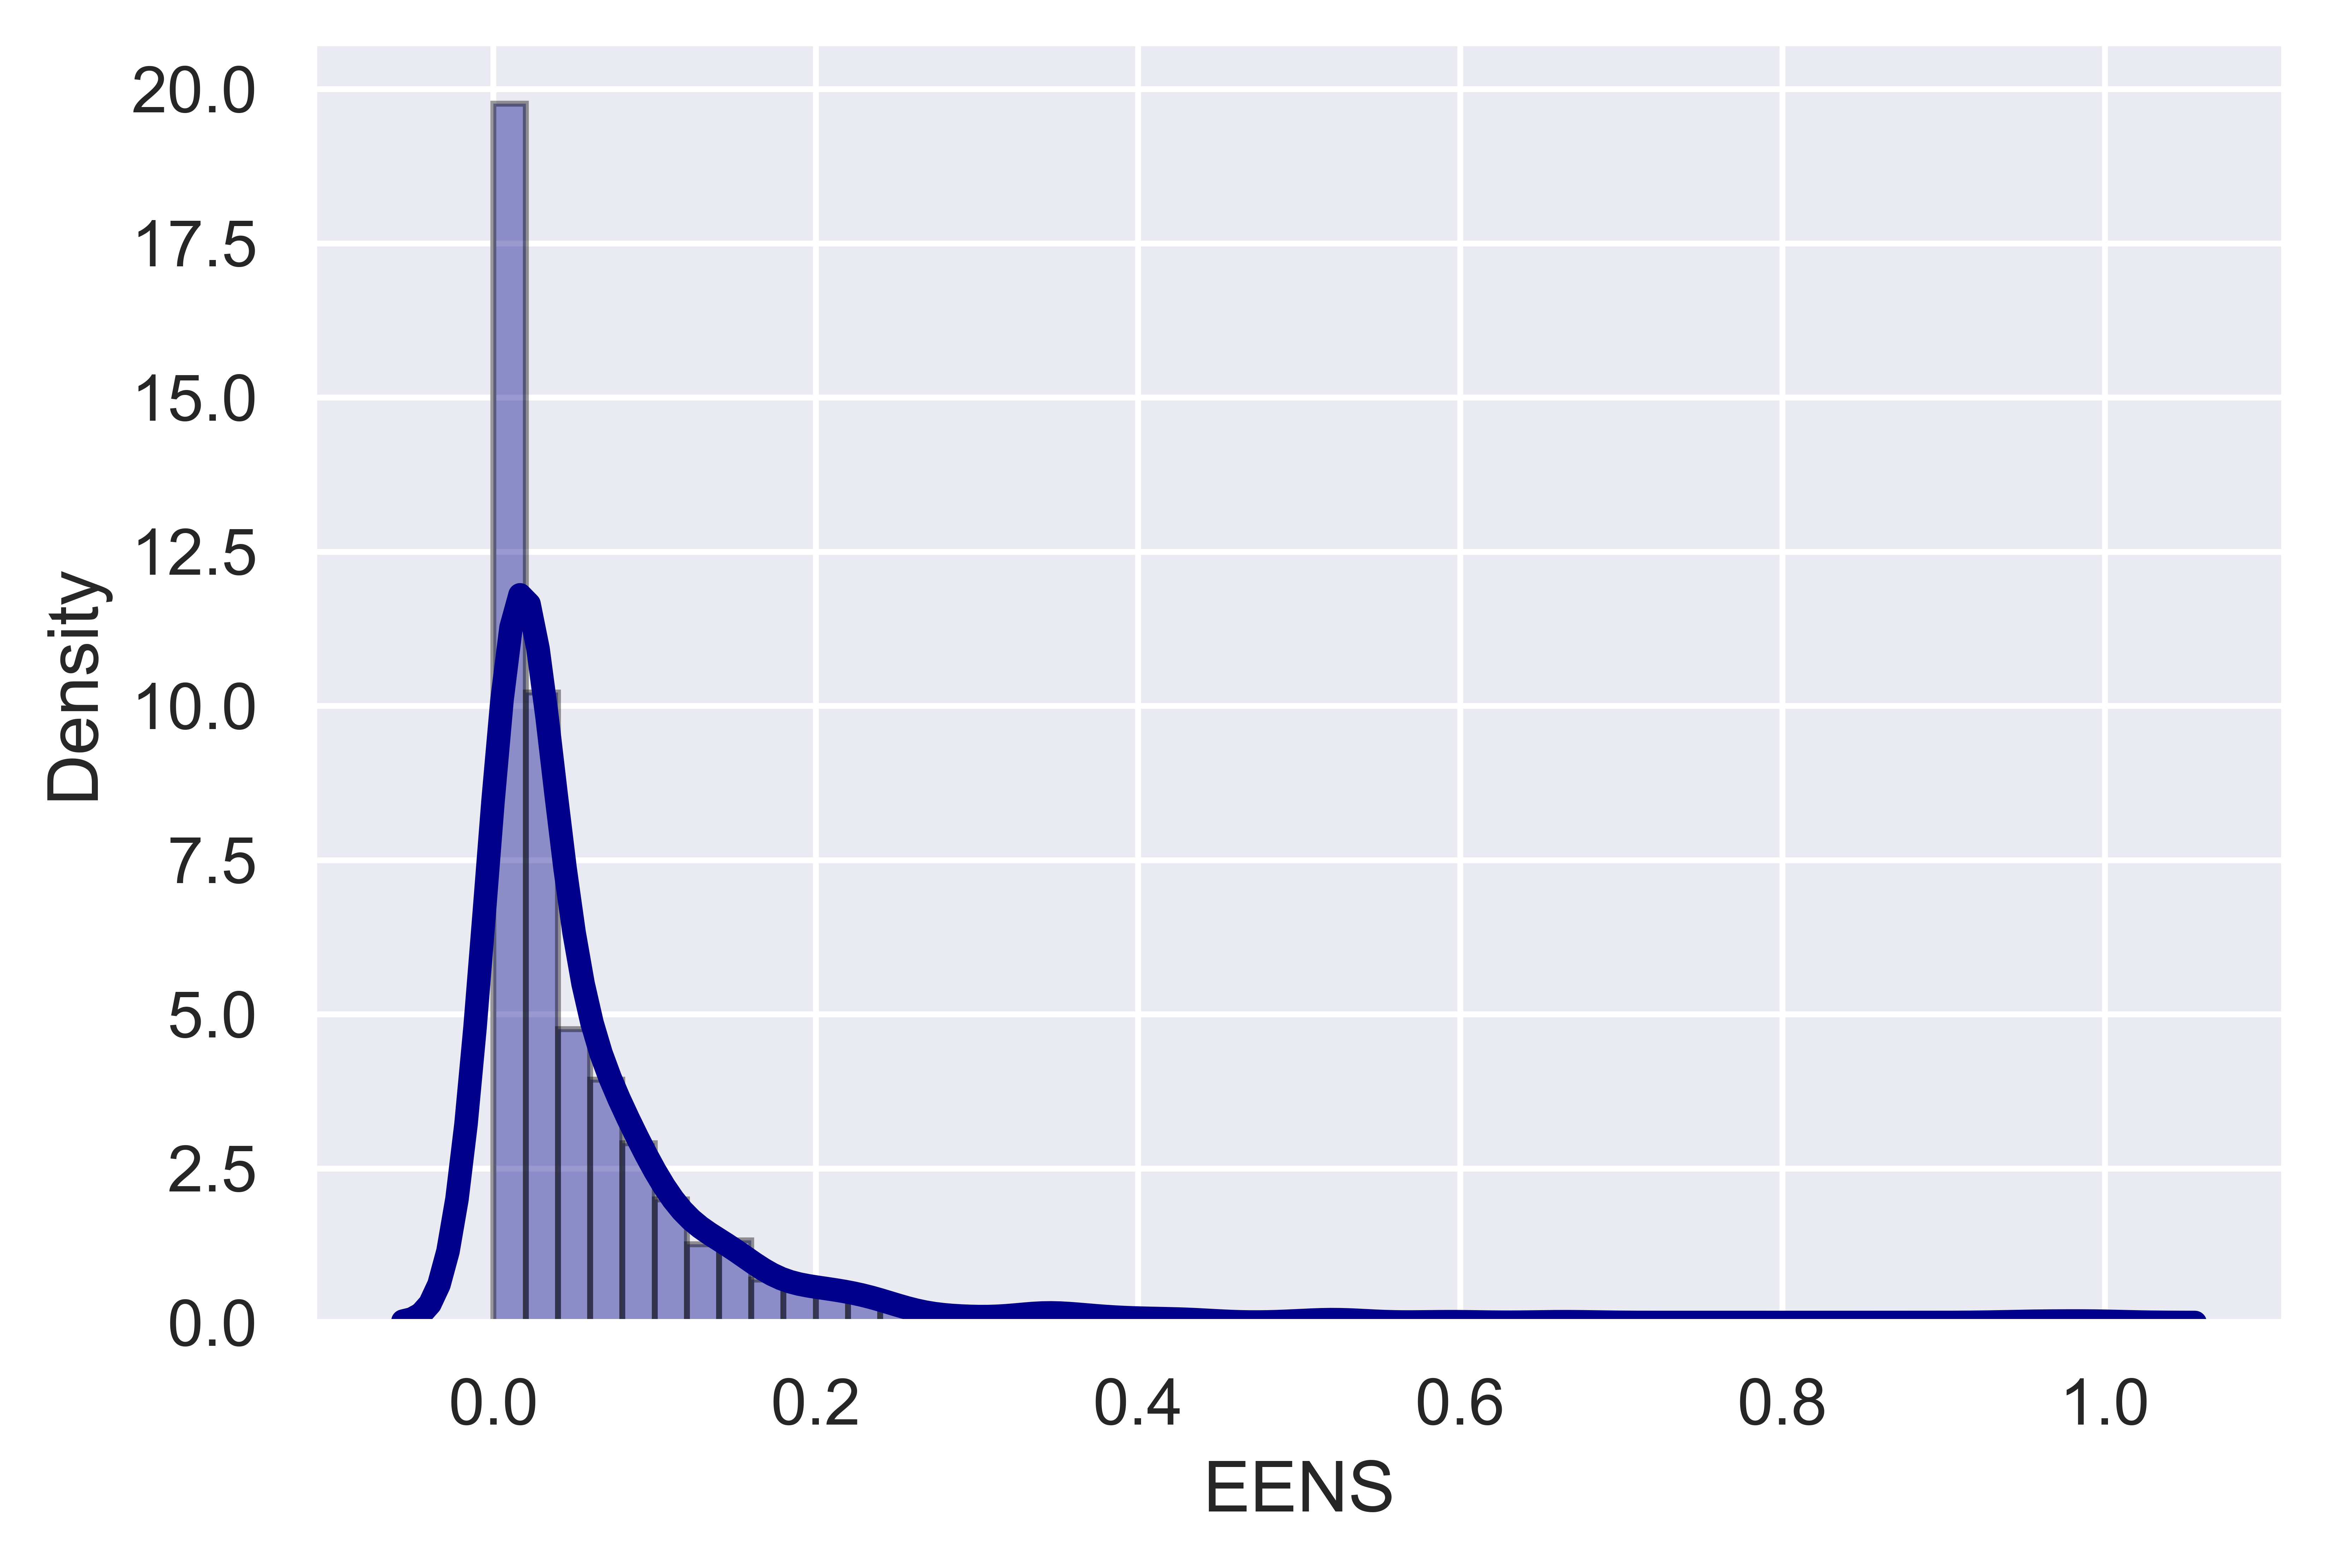

In [17]:
plt.figure(dpi=1200)
sns.distplot(Data['EENS'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});